In [100]:
file = '../output/temperatures_vs_time_minmax.txt'



In [233]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [251]:
temps = pd.read_csv(file, delim_whitespace=True, header=None, names=['Time',
                                                                  'PSD0Min', 'PSD0Max',
                                                                 'PSD1Min', 'PSD0Max',
                                                                 'Laser0Min', 'Laser0Max',
                                                                 'Laser10Min', 'Laser1Max',
                                                                 'Laser0ExtMin', 'Laser0ExtMax',
                                                                 'Laser1ExtMin', 'Laser1ExtMax'])
intensity = pd.read_csv('../output/metrology_on_vs_time.txt', delim_whitespace=True, header=None,
                       names=['Time', 'Int0', 'Noise0', 'Int1', 'Noise1'])
temps = temps.sort_values(by='Time').drop_duplicates('Time')
intensity = intensity.sort_values(by='Time').drop_duplicates('Time')

temps = temps[temps['Time'] > 600]
intensity = intensity[intensity['Time']>600]

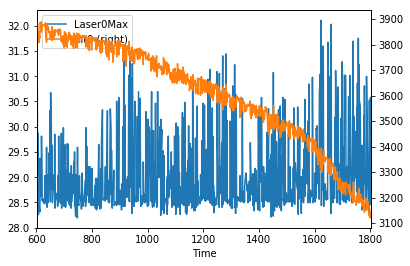

In [348]:
ax = temps.plot(x='Time', y='Laser0Max')
intensity.plot(x='Time', y='Int0', ax = ax, secondary_y='Int0')



In [686]:
intensity['Int0Roll'] = pd.rolling_mean(intensity['Int0'], window = 25)
temps['L0MaxRoll'] = pd.rolling_mean(temps['Laser0Max'], window = 25)
intensity['Int0Der'] = pd.rolling_mean(intensity['Int0Roll'].diff(1) / intensity['Time'].diff(1), window=25)
intensity['DT'] = pd.rolling_mean(intensity['Time'].diff(1), window=25)

temps['L0MaxRollScaled'] = -4*(temps['L0MaxRoll'] - 28.7) + 0.5

/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  if __name__ == '__main__':
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  from ipykernel import kernelapp as app
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  app.launch_new_instance()
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be 

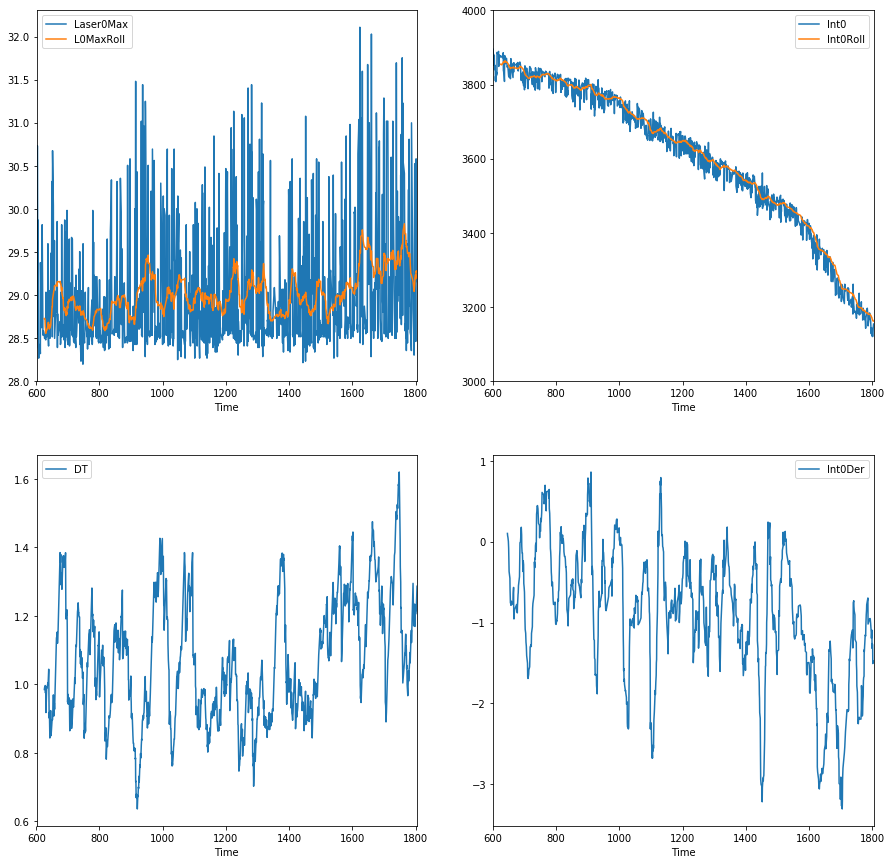

In [687]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
temps.plot(x='Time', y='Laser0Max', ax = axarr[0, 0])
temps.plot(x='Time', y='L0MaxRoll', ax = axarr[0, 0])

intensity.plot(x='Time', y='Int0', ax= axarr[0, 1], ylim = [3000, 4000])
intensity.plot(x='Time', y='Int0Roll', ax= axarr[0, 1], ylim = [3000, 4000])

intensity.plot(x='Time', y='Int0Der', ax= axarr[1, 1])

# intensity.plot(x='Time', y='Int0Der', ax= axarr[1, 0], ylim = (-20, 10))
# temps.plot(x='Time', y='L0MaxRollScaled', ax =axarr[1, 0])
intensity.plot(x='Time', y='DT', ax =axarr[1, 0])




plt.show()


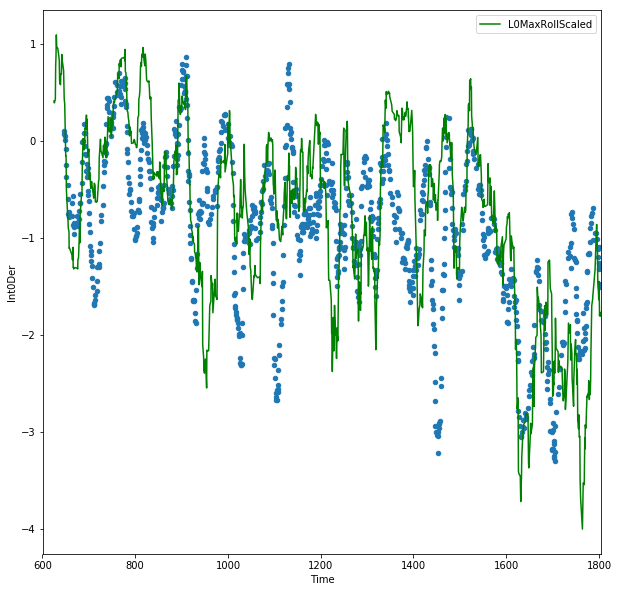

In [685]:
fig, ax = plt.subplots(1, figsize=(10, 10))
intensity.plot(x='Time', y='Int0Der', kind='Scatter', ax = ax)
temps.plot(x='Time', y='L0MaxRollScaled', ax =ax, color='green')



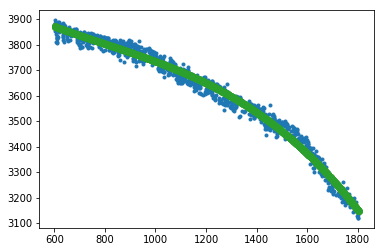

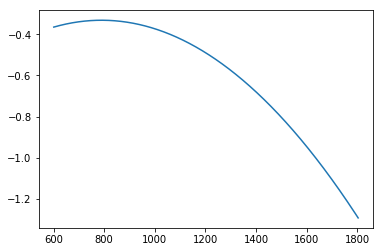

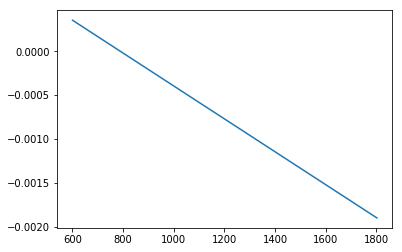

In [679]:
x = intensity['Time'].values
y=intensity['Int0'].values

from scipy import interpolate

s2 = inter.UnivariateSpline (x[::-1], y[::-1], s=1e6)
plt.plot(x, y, '.')
plt.plot(x, s2(x), label="S")

xnew = np.arange(min(x), max(x), 1)
plt.plot(xnew, s2(xnew), 'o')
plt.show()

ynew =s2(xnew)
dy = np.diff(ynew)
plt.plot(xnew[0:len(xnew)-1], dy)
plt.show()
ddy = np.diff(dy)
plt.plot(xnew[0:len(xnew)-2], ddy)






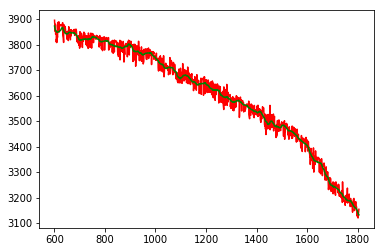

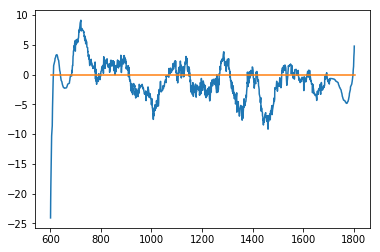

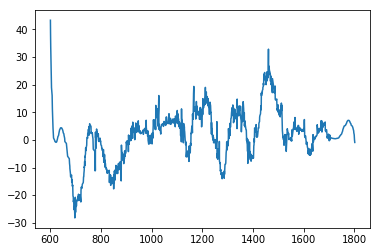

In [636]:
from scipy.signal import savgol_filter
ysmth = savgol_filter(y, 51, 3)

x = intensity['Time'].values
y=intensity['Int0'].values



plt.plot(x, y, 'r-')
plt.plot(x[0:len(x)], ysmth, 'g-')

plt.show()
dv = np.diff(y) / np.diff(x)
dv_smth = savgol_filter(dv, 151, 5)

#ddv = np.diff(dv) / np.diff(x[0:len(x)-1])

#ddv_smth = savgol_filter(ddv, 151, 5)


plt.plot(x[0:len(x)-1], dv_smth)
plt.plot([min(x), max(x)], [0, 0])
#plt.plot(x[0:len(x)-1], dv_smth, 'g-')
plt.show()
plt.plot(x[0:len(x)-2], ddv_smth)





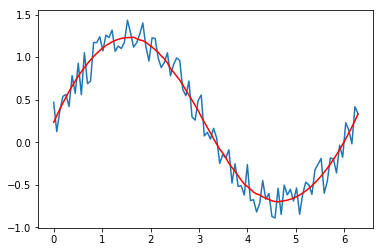

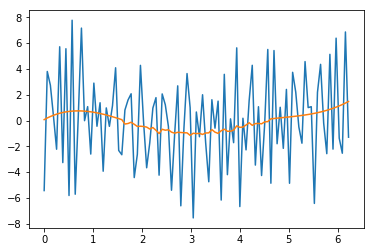

In [614]:



x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.5
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

dy = np.diff(y) / np.diff(x)
plt.plot(x[0:len(x)-1], dy)
dyhat = savgol_filter(dy, 51, 3) # window size 51, polynomial order 3
plt.plot(x[0:len(x)-1], dyhat)



